In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline
sns.set_style("darkgrid")

### Generate train and test values

In [151]:
#X_train = np.linspace(0, 1, 1200)
#X_test = np.linspace(0, 1, 300)
X = np.linspace(0, 1, 1500)
@np.vectorize
def target(x):
    return x > 0.5
#y_train = target(X_train) + np.random.randn(*X_train.shape) * 0.1
#y_test = target(X_test) + np.random.randn(*X_test.shape) * 0.1
y = target(X) + np.random.randn(*X.shape) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=42, shuffle=True)

### Sort train and test values

In [152]:
zipped_lists = zip(X_train, y_train)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
X_train, y_train = np.array([list(tuple) for tuple in  tuples])

zipped_lists = zip(X_test, y_test)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
X_test, y_test = np.array([list(tuple) for tuple in  tuples])

### Plot two class distribution

Text(0.5,1,'Two group random distribution')

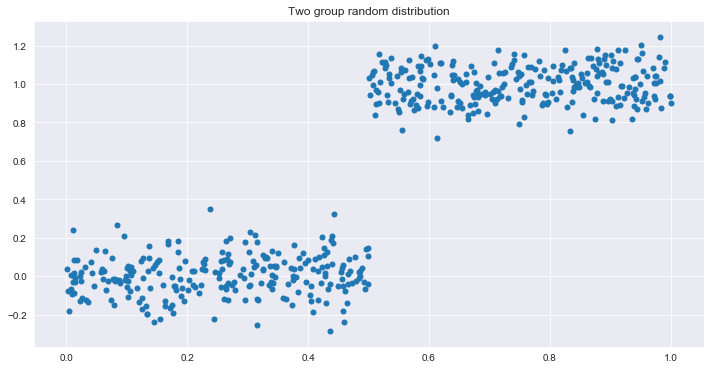

In [153]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, s = 25)
plt.title('Two group random distribution')

MAE GBM(1): -0.538 (0.051)
MAE RF(1): -0.146 (0.068)
MAE GBM(2): -0.487 (0.043)
MAE RF(2): -0.140 (0.047)
MAE GBM(5): -0.356 (0.025)
MAE RF(5): -0.126 (0.048)
MAE GBM(20): -0.112 (0.048)
MAE RF(20): -0.118 (0.043)
MAE GBM(100): -0.109 (0.048)
MAE RF(100): -0.117 (0.045)
MAE GBM(500): -0.129 (0.040)
MAE RF(500): -0.114 (0.046)
MAE GBM(1000): -0.143 (0.043)
MAE RF(1000): -0.113 (0.046)
MAE GBM(2000): -0.151 (0.046)
MAE RF(2000): -0.114 (0.046)


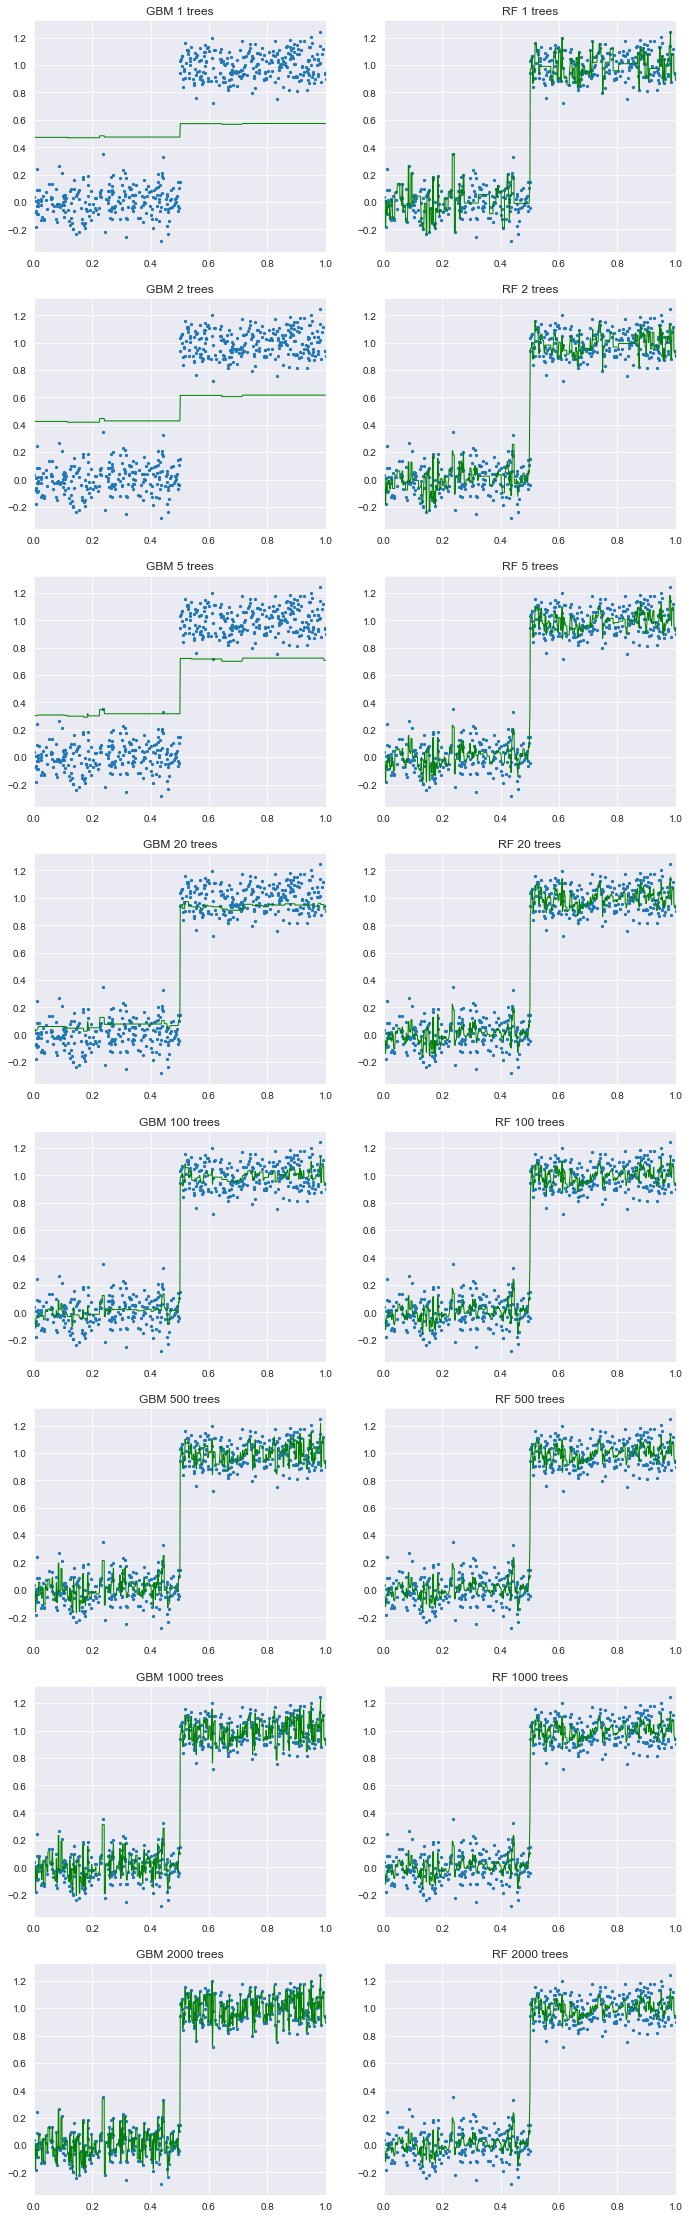

In [156]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(max_depth=10, warm_start=True, verbose=0)
gbm = GradientBoostingRegressor(warm_start=True, verbose=0)

plt.figure(figsize=(11.5, 40))

est_list = [1, 2, 5, 20, 100, 500, 1000, 2000]

for idx, est in  enumerate(est_list):
    gbm.n_estimators = est    
    scores = cross_val_score(gbm, X_train.reshape(-1, 1), y_train, scoring='neg_mean_absolute_error', 
                             cv=5, n_jobs=-1, error_score='raise')
    print('MAE GBM(%d): %.3f (%.3f)' % (est, np.mean(scores), np.std(scores)))    
    gbm.fit(X_train.reshape(-1, 1), y_train)
    
    rf.n_estimators = est
    scores = cross_val_score(rf, X_train.reshape(-1, 1), y_train, scoring='neg_mean_absolute_error', 
                             cv=5, n_jobs=-1, error_score='raise')    
    print('MAE RF(%d): %.3f (%.3f)' % (est, np.mean(scores), np.std(scores)))        
    rf.fit(X_train.reshape(-1, 1), y_train)   
   
    plt.subplot(8, 2, 2 * idx + 1)
    plt.xlim([0, 1])
    plt.scatter(X_train, y_train, s = 5)      
    plt.plot(X_test, gbm.predict(X_test.reshape(-1, 1)), c='green', linewidth=1)
    plt.title('GBM {} trees'.format(est))
    
    plt.subplot(8, 2, 2 * idx + 2)
    plt.xlim([0, 1])
    plt.scatter(X_train, y_train, s = 5)
    plt.plot(X_test, rf.predict(X_test.reshape(-1, 1)), c='green', linewidth=1)
    plt.title('RF {} trees'.format(est))   